In [0]:
# XGBoost
import numpy as np
from sklearn import svm
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import roc_auc_score,confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import xgboost

In [2]:
!pip install livelossplot

  Running setup.py bdist_wheel for livelossplot ... - done
  Stored in directory: /content/.cache/pip/wheels/cc/21/68/7a100707fa56b30f1ebb1217d976dea4271a4a5ce55a295df4
Successfully built livelossplot


In [9]:
!pip install pydot
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,122 kB of archives.
After this operation, 2

Unpacking libpixman-1-0:amd64 (0.34.0-1) ...
Selecting previously unselected package libxcb-render0:amd64.
Preparing to unpack .../09-libxcb-render0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-render0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-shm0:amd64.
Preparing to unpack .../10-libxcb-shm0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libcairo2:amd64.
Preparing to unpack .../11-libcairo2_1.14.10-1ubuntu1_amd64.deb ...
Unpacking libcairo2:amd64 (1.14.10-1ubuntu1) ...
Selecting previously unselected package libltdl7:amd64.
Preparing to unpack .../12-libltdl7_2.4.6-2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-2) ...
Selecting previously unselected package libthai-data.
Preparing to unpack .../13-libthai-data_0.1.26-3_all.deb ...
Unpacking libthai-data (0.1.26-3) ...
Selecting previously unselected package libdatrie1:amd64.
Preparing to unpack .../14-libdatrie1_0.2.10-5_amd64.deb ...

In [2]:
# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, InputLayer
from keras.wrappers.scikit_learn import KerasClassifier
from livelossplot import PlotLossesKeras
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [7]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [5]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [0]:
import zipfile
with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [0]:
data1 = np.load("./sample_data.npy")
data2 = np.load("./sample_data_2.npy")
data3 = np.load("./sample_data_3.npy")
data4 = np.load("./sample_data_4.npy")

In [0]:
data = np.append(data1, data2, axis=0)
data = np.append(data, data3, axis=0)
data = np.append(data, data4, axis=0)

In [6]:
MALIGNANT_THRESHOLD = 3
X = data[:,1:]
y = [ 1 if i > MALIGNANT_THRESHOLD else 0 for i in data[:,0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("Total Datapoints: %d" % len(y))
print("Num Malignant In Total: %d, %f" % (np.sum(y), np.sum(y)/len(y)))
print("Num Malignant In Train: %d, %f" % (np.sum(y_train), np.sum(y_train)/len(y_train)))
print("Num Malignant In Test: %d, %f" % (np.sum(y_test), np.sum(y_test)/len(y_test)))

Total Datapoints: 5910
Num Malignant In Total: 1460, 0.247039
Num Malignant In Train: 1226, 0.244077
Num Malignant In Test: 234, 0.263811


In [0]:
X_train_annotations = X_train[:,:9]
X_test_annotations = X_test[:,:9]
X_train_image = X_train[:,9:].reshape(X_train.shape[0], 32, 32, 1)
X_test_image = X_test[:,9:].reshape(X_test.shape[0], 32, 32, 1)
input_shape = (32,32,1)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=[f1])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        36928     
__________

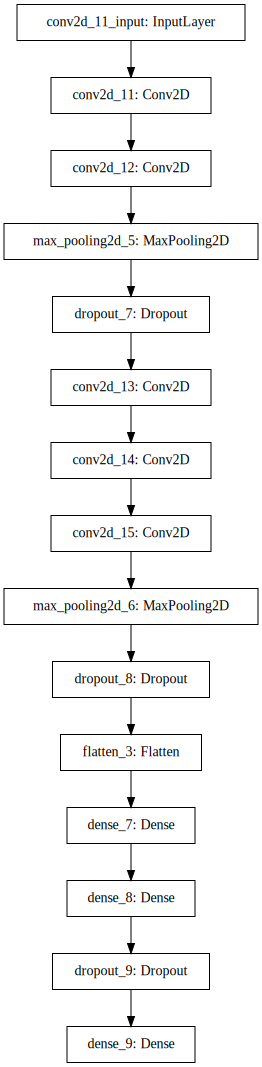

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


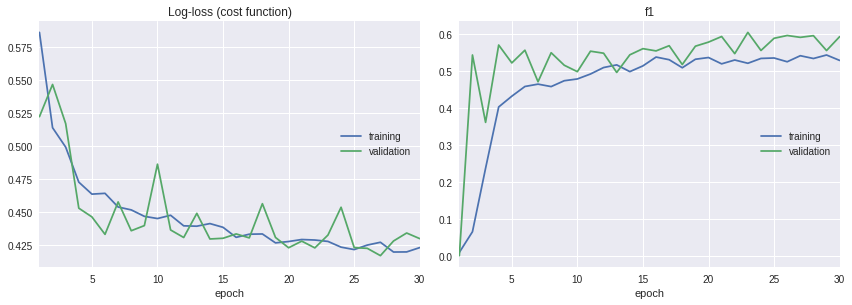

In [19]:
# If using data augmentation
datagen = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=0,
    # randomly shift images horizontally
    width_shift_range=0.1,
    # randomly shift images vertically
    height_shift_range=0.1,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False)

datagen.fit(X_train_image)

model.fit_generator(datagen.flow(X_train_image, y_train, batch_size=128),
                    validation_data=(X_test_image, y_test),
                    epochs=30, verbose=1, workers=4,
                    callbacks=[PlotLossesKeras()])


In [76]:
# Experiments
from keras.applications import VGG16
from keras.layers import Lambda, Input, BatchNormalization
from keras.models import Model
from keras.backend import tf as ktf

resize = Lambda(lambda image: ktf.image.resize_images(image, (48, 48)))

model = Sequential()
model.add(InputLayer(input_shape))
model.add(out)
model.add(BatchNormalization())
model.add(Conv2D(10, kernel_size = (1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(3, kernel_size = (1,1), padding = 'same', activation = 'relu'))
vgg16_model = VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))

for layer in vgg16_model.layers:
    layer.trainable = False
    
# unfreeze last 4 layers
for layer in vgg16_model.layers[15:]:
    layer.trainable = True
    
    
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

opt=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)

for i, layer in enumerate(vgg16_model.layers):
   print(i, layer.name)

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=opt,
              metrics=[f1])

model.summary()

0 input_25
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 32, 32, 1)         0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 48, 48, 1)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 1)         4         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 48, 48, 10)        20        
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 48, 48, 3)         

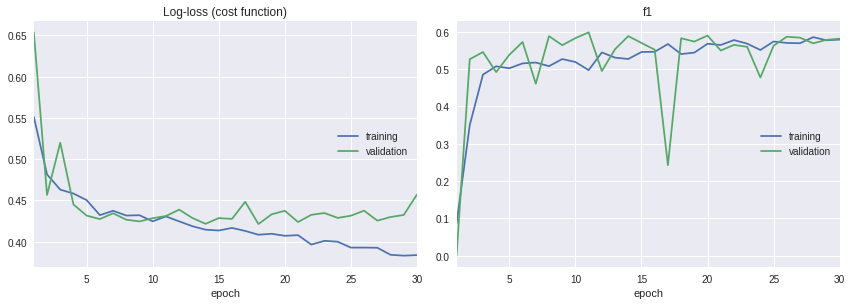

In [77]:
# On VGG

# If using data augmentation
datagen = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=0,
    # randomly shift images horizontally
    width_shift_range=0.1,
    # randomly shift images vertically
    height_shift_range=0.1,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=True)

datagen.fit(X_train_image)

model.fit_generator(datagen.flow(X_train_image, y_train, batch_size=128),
                    validation_data=(X_test_image, y_test),
                    epochs=30, verbose=1, workers=4,
                    callbacks=[PlotLossesKeras()])


In [79]:
# VGG Results
y_pred = model.predict_classes(X_test_image)
y_score = model.predict_proba(X_test_image)
evaluate(y_test, y_pred.flatten(), y_score)

F1-Score: 0.586466
ROC-Score: 0.834927
Confusion Matrix:

 Predicted    0    1  All
True                    
0          605   48  653
1          117  117  234
All        722  165  887


In [44]:
# Hongyi's Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

opt=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=opt,
              metrics=[f1])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 64)        36928     
__________

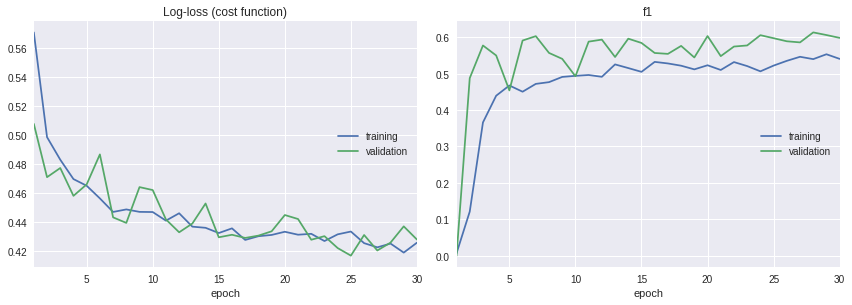

In [13]:
# Hongyi's

# If using data augmentation
datagen = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=0,
    # randomly shift images horizontally
    width_shift_range=0.1,
    # randomly shift images vertically
    height_shift_range=0.1,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=True)

datagen.fit(X_train_image)

model.fit_generator(datagen.flow(X_train_image, y_train, batch_size=128),
                    validation_data=(X_test_image, y_test),
                    epochs=30, verbose=1, workers=4,
                    callbacks=[PlotLossesKeras()])


In [20]:
#Hongyi
y_pred = model.predict_classes(X_test_image)
y_score = model.predict_proba(X_test_image)
evaluate(y_test, y_pred.flatten(), y_score)

F1-Score: 0.598540
ROC-Score: 0.834763
Confusion Matrix:

 Predicted    0    1  All
True                    
0          599   54  653
1          111  123  234
All        710  177  887


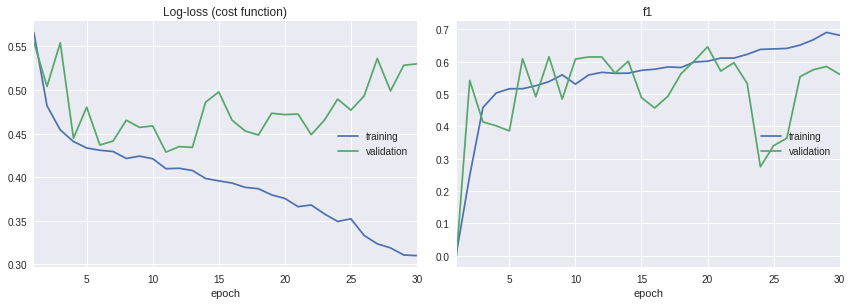

In [42]:
# DO NOT USE
model.fit(X_train_image, y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          callbacks=[PlotLossesKeras()],
          validation_data=(X_test_image, y_test))

In [0]:
def evaluate(y_test, y_pred, y_score):
    print("F1-Score: %f" % f1_score(y_test, y_pred))
    print("ROC-Score: %f" % roc_auc_score(y_test,y_score))
    print("Confusion Matrix:\n\n",pd.crosstab(pd.Series(y_test), pd.Series(y_pred), rownames=['True'], colnames=['Predicted'],margins=True))

In [0]:
def combined_predict(image_model, annotations_model, w):
  y_score_im = image_model.predict_proba(X_test_image)
  y_score_ann = annotations_model.predict_proba(X_test_annotations)[:,1]
  
  pred = []
  pred_proba = []
  for i in range(len(y_score_im)):
    prob = w * y_score_ann[i] + (1-w) * y_score_im[i]
    pred_proba.append(prob)
    if prob > 0.5:
      pred.append(1)
    else:
      pred.append(0)
  return pred, pred_proba


In [83]:
y_pred, y_score = combined_predict(model,xgbclassifier, .75)
evaluate(y_test, y_pred, y_score)

F1-Score: 0.674757
ROC-Score: 0.906408
Confusion Matrix:

 Predicted    0    1  All
True                    
0          614   39  653
1           95  139  234
All        709  178  887


In [11]:
xgbclassifier = xgboost.XGBClassifier(verbose=True)
xgbclassifier.fit(X_train_annotations, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=True)

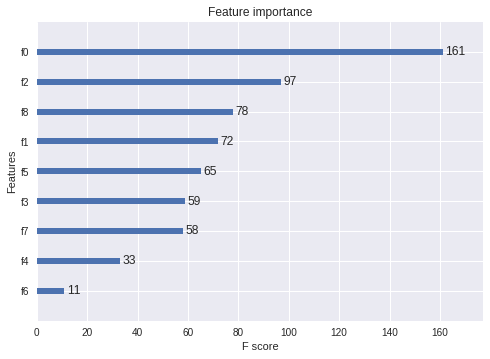

In [15]:
xgboost.plot_importance(xgbclassifier)

In [14]:
y_score = xgbclassifier.predict_proba(X_test_annotations)[:,1]
y_pred = xgbclassifier.predict(X_test_annotations)
evaluate(y_test, y_pred, y_score)

F1-Score: 0.685185
ROC-Score: 0.909687
Confusion Matrix:

 Predicted    0    1  All
True                    
0          603   50  653
1           86  148  234
All        689  198  887


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [100]:
# SVM Classifiers
classifier = svm.SVC(kernel='linear', C=0.1, probability=True)
#classifier = svm.LinearSVC(dual=True, C=0.1)

# Stochastic Gradient Descent Classifiers
#classifier = linear_model.SGDClassifier(class_weight="balanced", max_iter=25)
#classifier = linear_model.SGDClassifier(loss="squared_hinge", class_weight="balanced", max_iter=25)
#classifier = linear_model.SGDClassifier(loss="perceptron", class_weight="balanced", max_iter=25)

# Ensemble Classifiers
#classifier = ensemble.RandomForestClassifier(n_estimators=100, max_depth=3)
#classifier = ensemble.ExtraTreesClassifier(n_estimators=100, max_depth=3)
#classifier = ensemble.AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train_annotations, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
scoring_op = getattr(classifier, "predict_proba", None)
if callable(scoring_op):
    y_score = classifier.predict_proba(X_test_annotations)[:,1]
else:
    y_score = classifier.decision_function(X_test_annotations)

y_pred = classifier.predict(X_test_annotations)
evaluate(y_test, y_pred, y_score)

F1-Score: 0.437870
ROC-Score: 0.848336
Confusion Matrix:

 Predicted    0    1  All
True                    
0          623   30  653
1          160   74  234
All        783  104  887


Confusion Matrix:
```
TP | FP
-------
FN | TN
```

## Show TP/FN

FN: -4


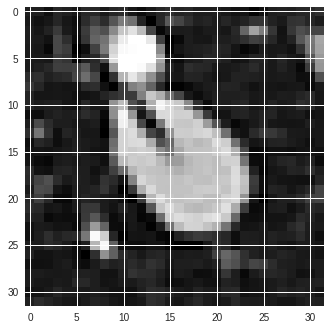

TP: 20.911993


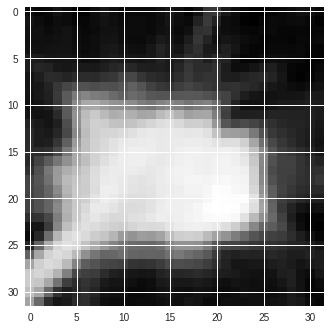

TP: 13.335029


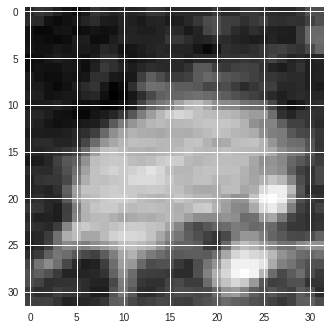

TP: 0.742243


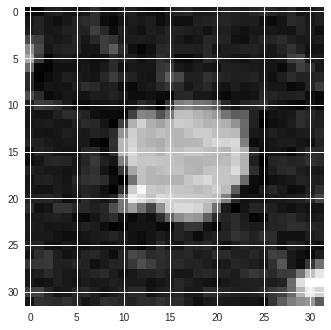

TP: 17.664969


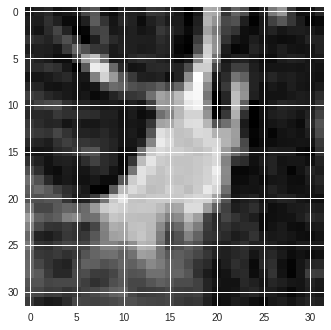

TP: 17.133221


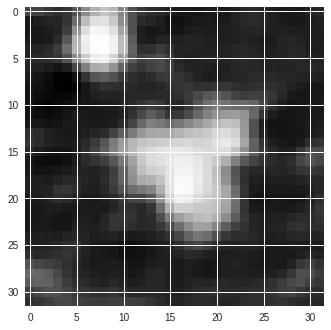

TP: 3.054640


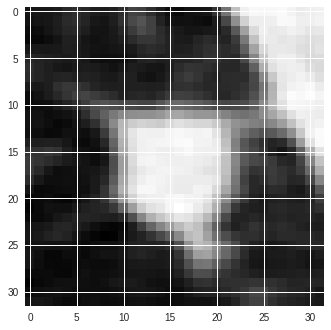

FN: 0


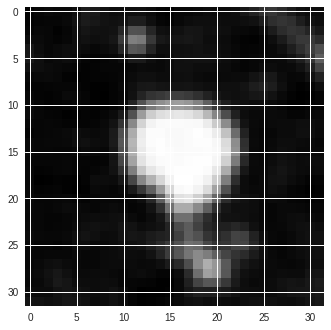

FN: -9


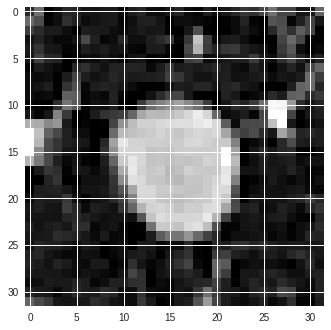

TP: 14.448341


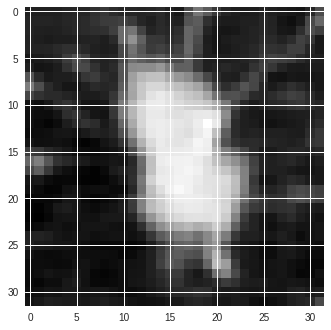

FN: -1


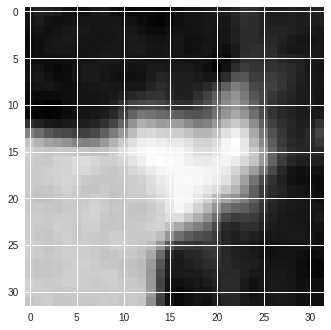

TP: 2.115737


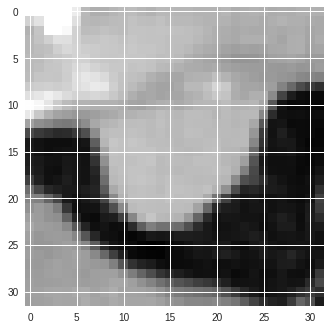

TP: 11.857161


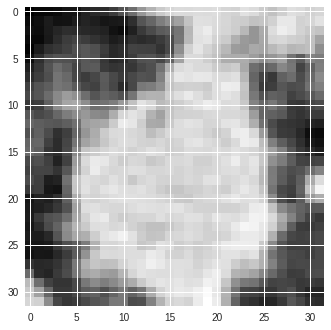

TP: 0.676271


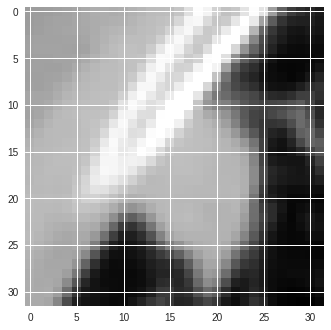

TP: 19.503065


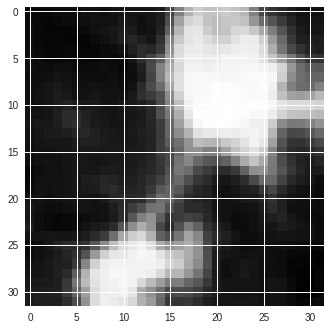

TP: 17.487213


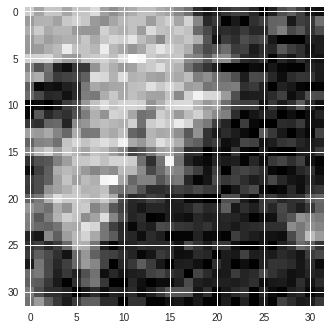

TP: 12.633029


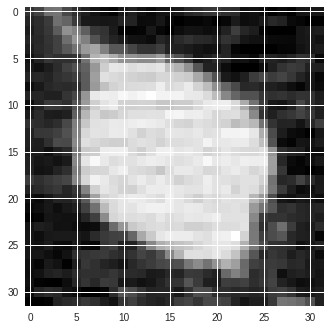

TP: 12.803058


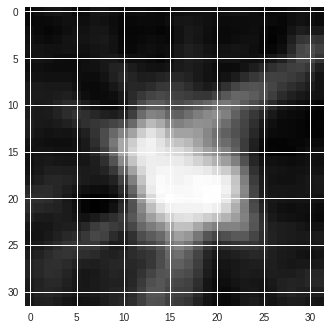

TP: 0.035355


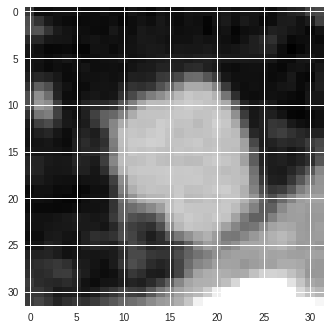

TP: 0.436098


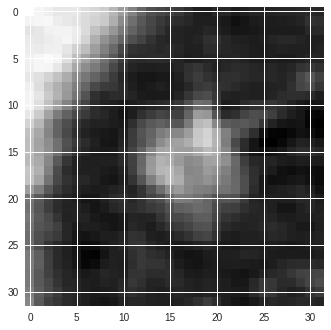

TP: 13.899293


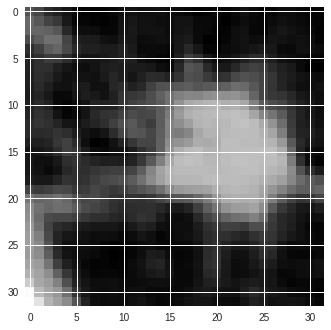

TP: 19.480829


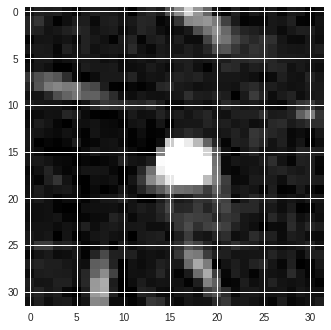

TP: 6.302870


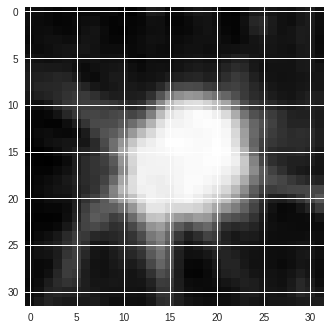

TP: 11.697316


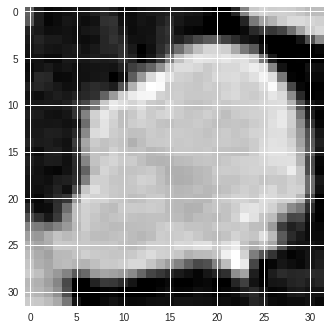

TP: 3.437842


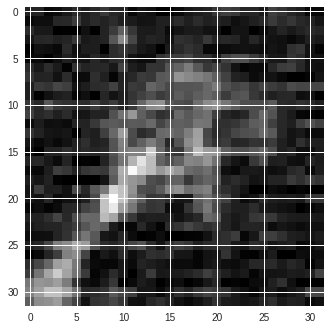

TP: 16.759573


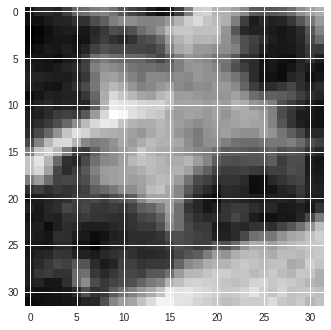

TP: 14.846236


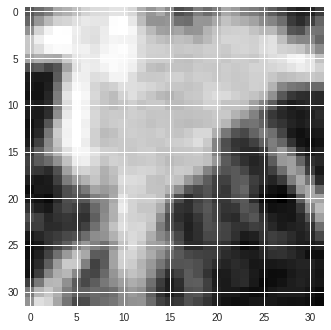

TP: 4.661807


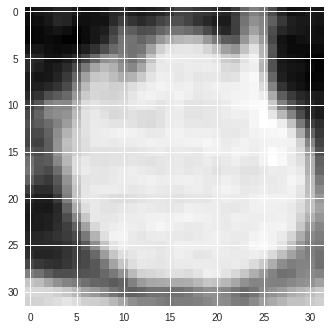

FN: -2


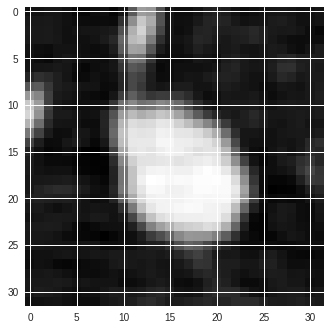

FN: -2


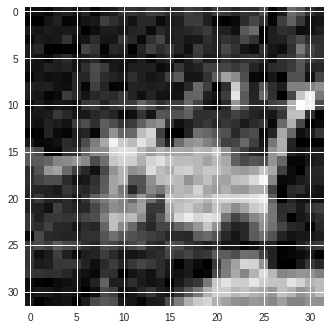

TP: 5.333874


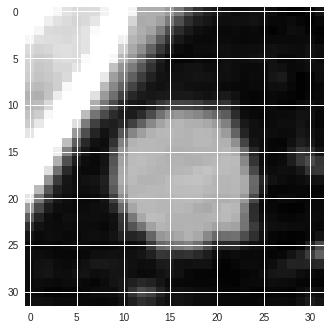

TP: 8.378849


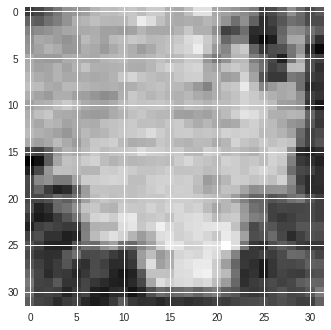

FN: -8


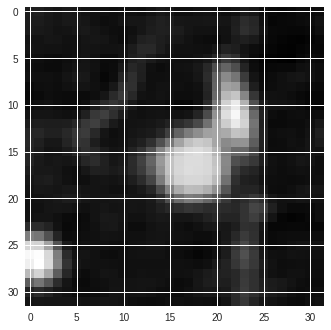

FN: -3


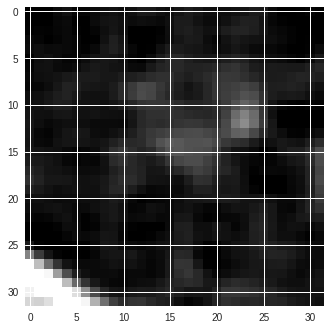

TP: 4.464974


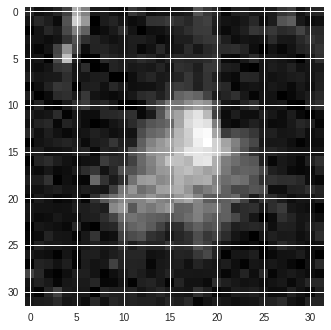

TP: 9.441332


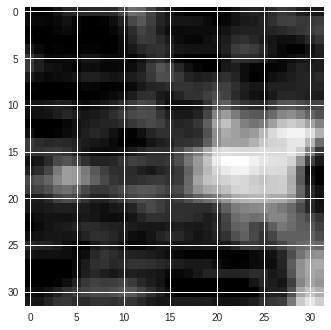

FN: 0


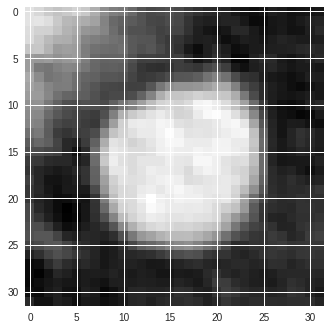

TP: 9.586478


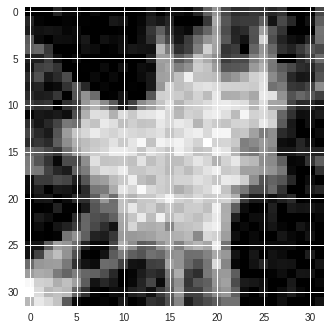

FN: -4


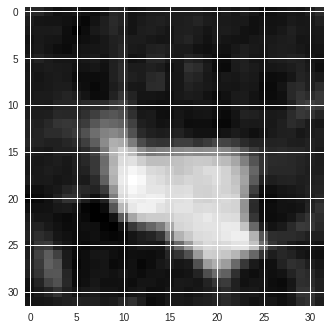

TP: 13.107330


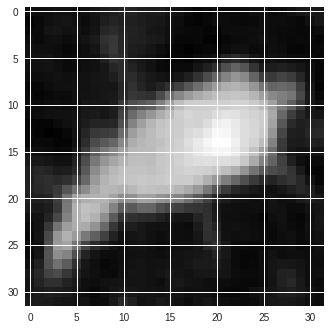

FN: 0


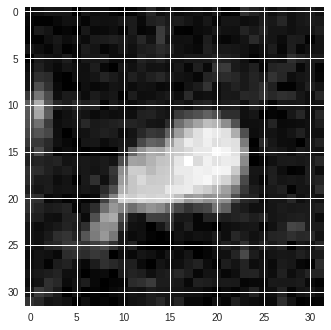

TP: 11.067854


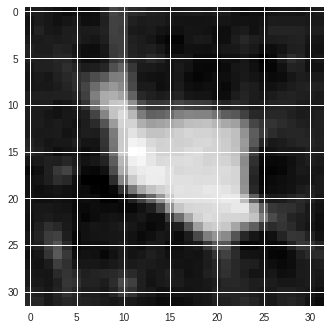

FN: -10


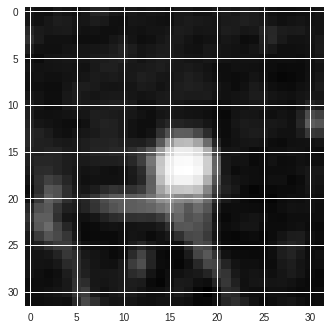

TP: 22.921953


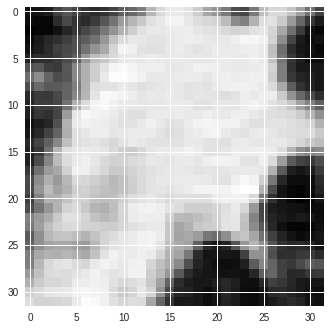

TP: 4.870197


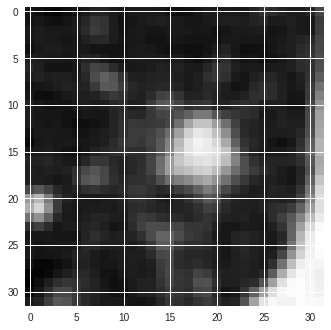

TP: 2.339548


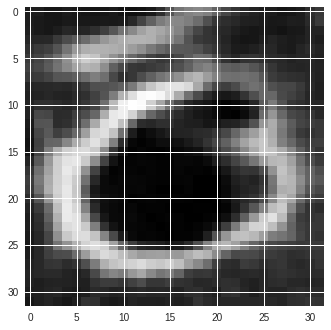

TP: 3.254632


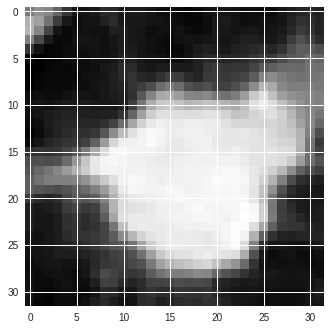

FN: -10


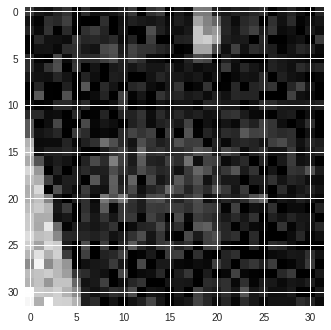

TP: 2.688614


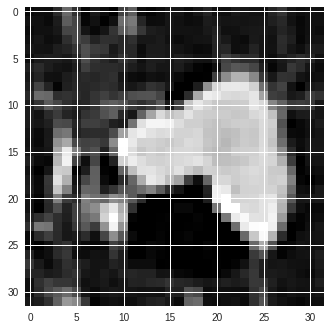

FN: -9


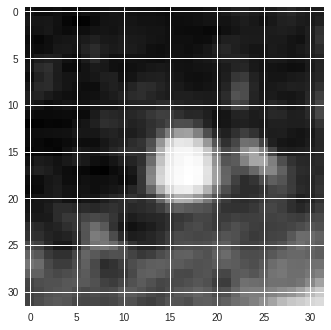

TP: 13.438439


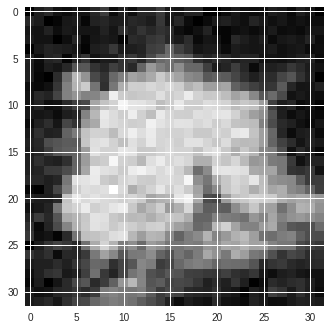

TP: 7.170216


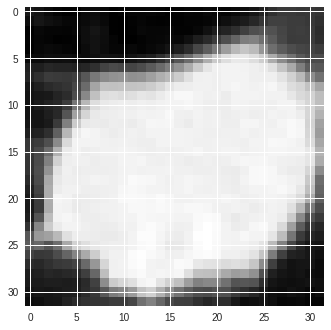

TP: 6.774266


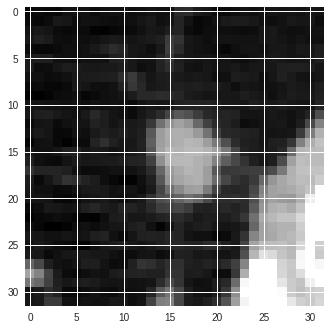

FN: 0


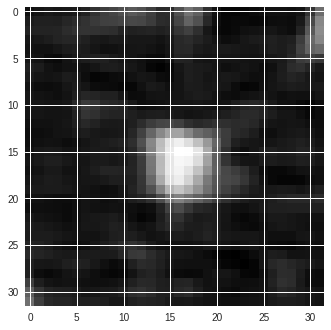

FN: -2


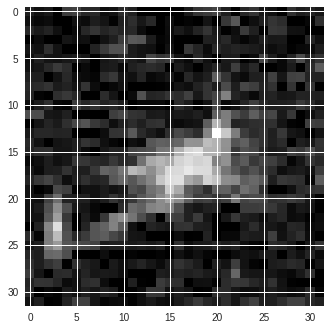

TP: 0.136220


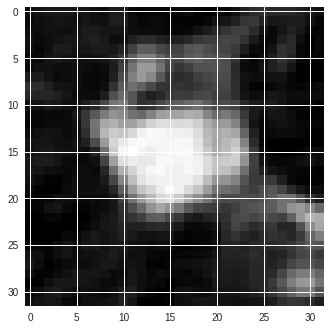

FN: -4


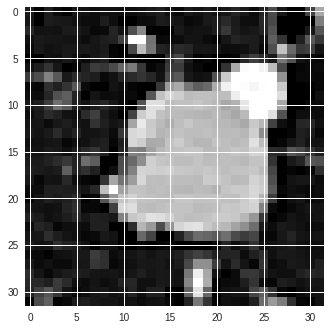

TP: 6.172813


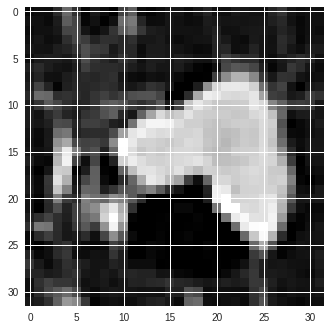

FN: -1


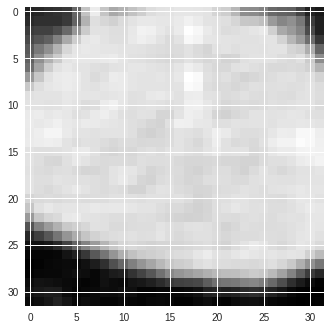

FN: 0


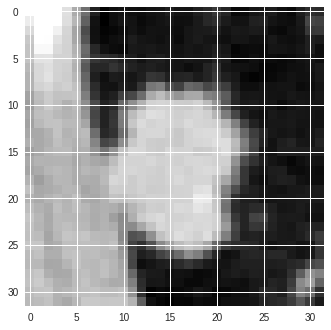

FN: -4


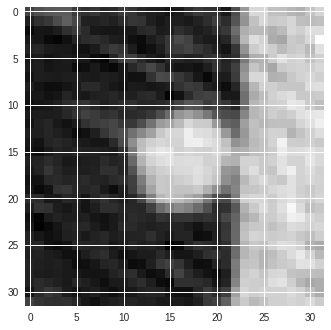

FN: -20


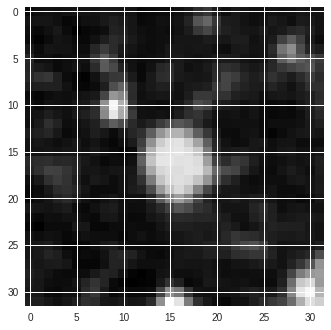

FN: -5


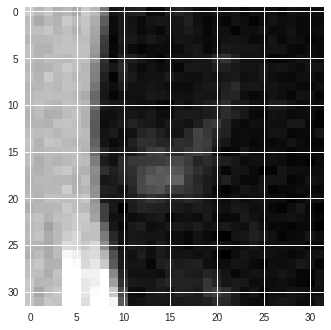

TP: 3.254632


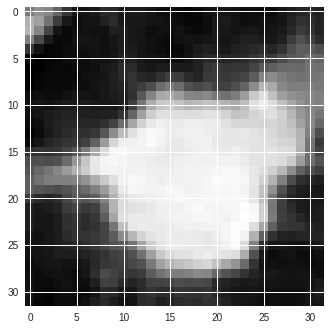

TP: 1.008305


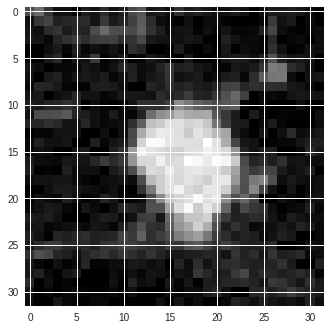

TP: 7.635289


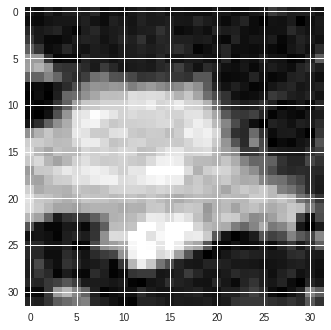

TP: 4.295566


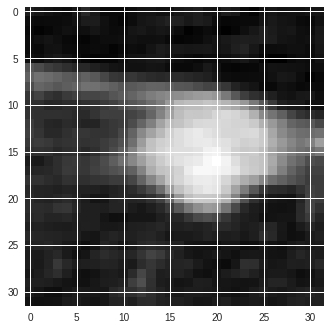

FN: -6


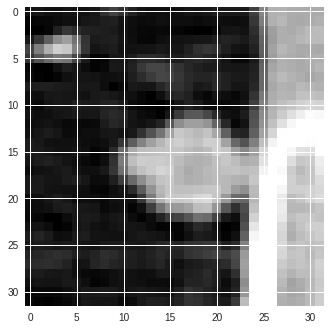

FN: -1


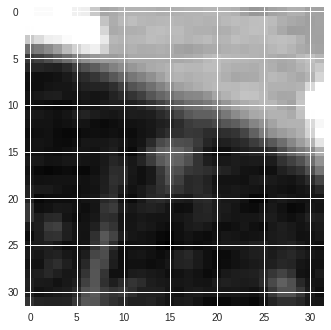

TP: 1.415986


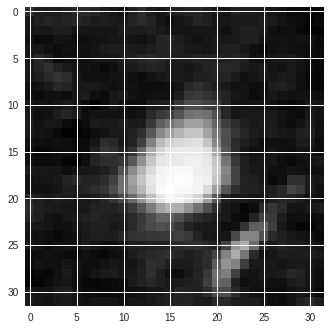

FN: -1


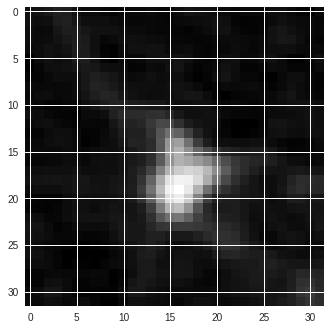

FN: -5


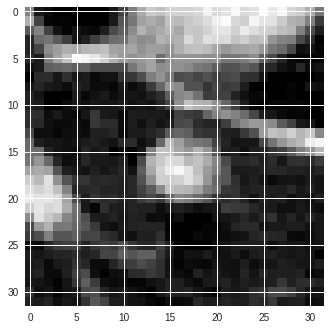

TP: 4.376581


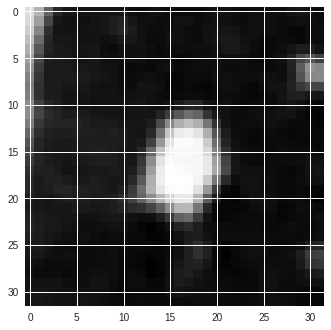

TP: 20.267624


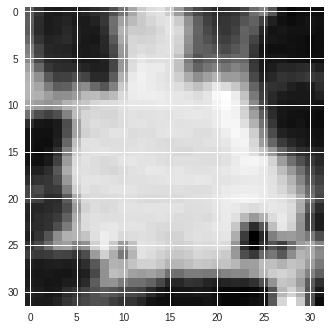

TP: 13.071584


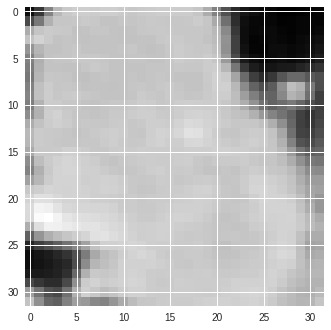

TP: 2.606779


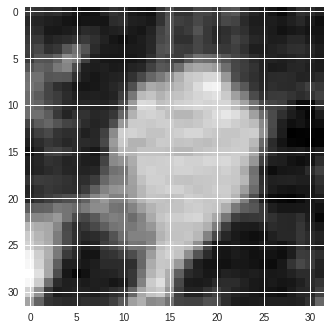

TP: 12.200864


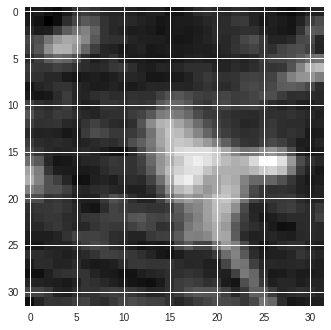

TP: 4.870197


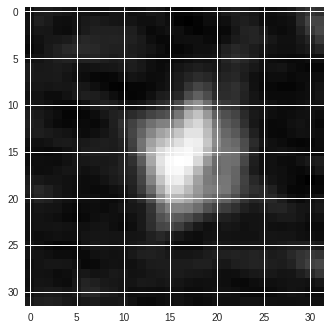

TP: 8.710269


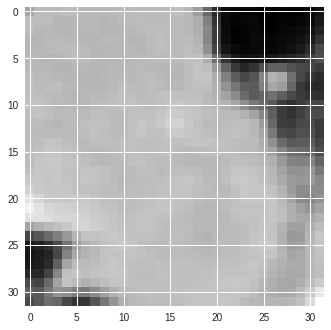

FN: -2


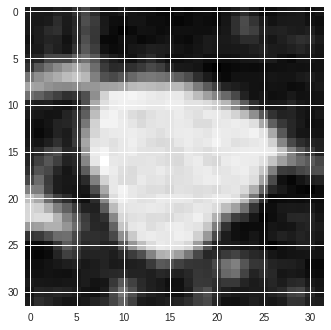

TP: 0.099885


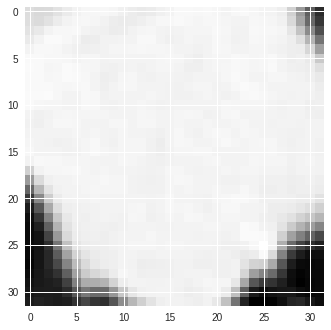

TP: 4.751245


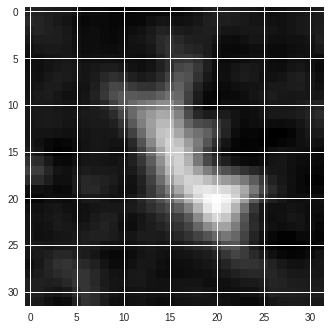

TP: 8.676277


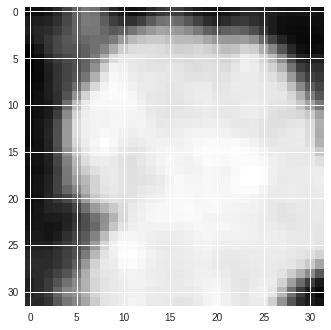

TP: 14.478129


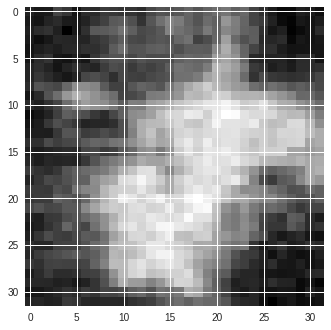

FN: -1


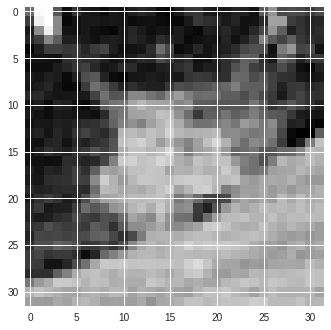

TP: 6.363051


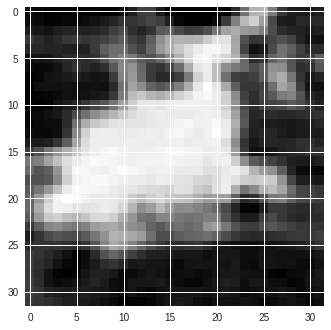

TP: 1.037273


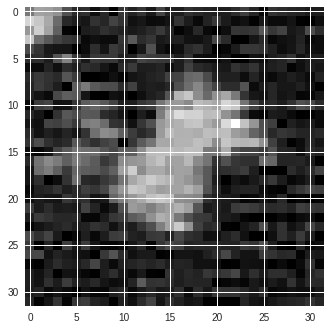

TP: 1.042968


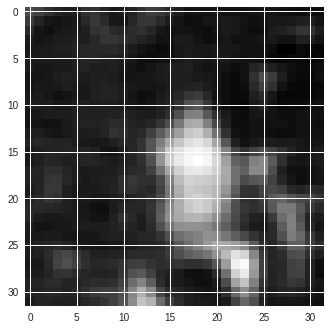

FN: -8


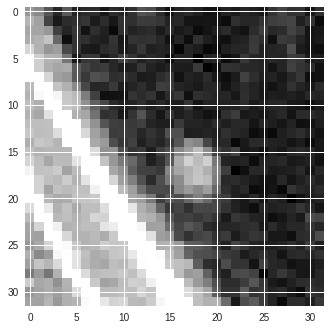

TP: 4.460426


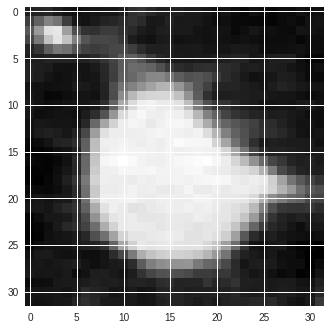

FN: -8


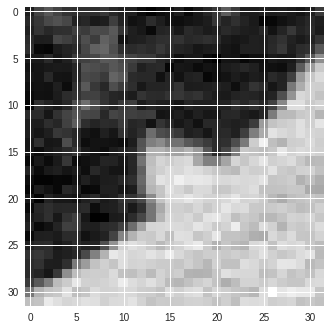

FN: -4


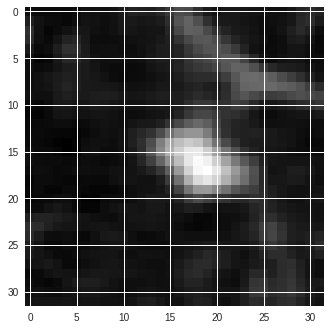

FN: -14


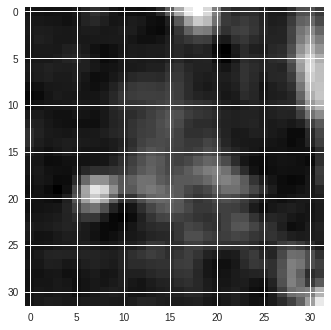

FN: -4


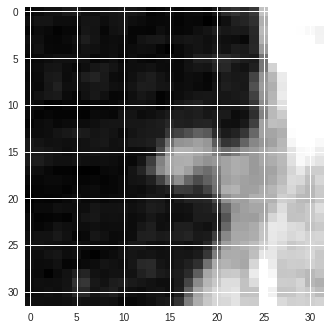

TP: 9.682293


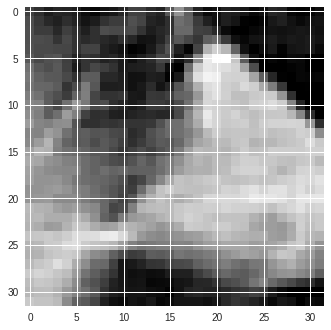

FN: -7


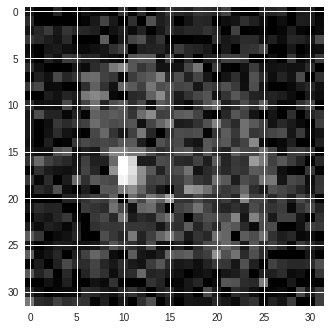

TP: 5.450891


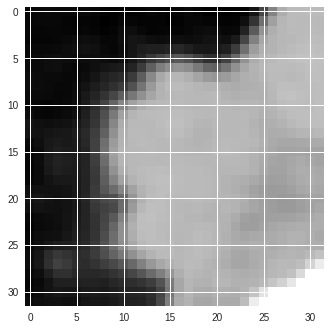

FN: -3


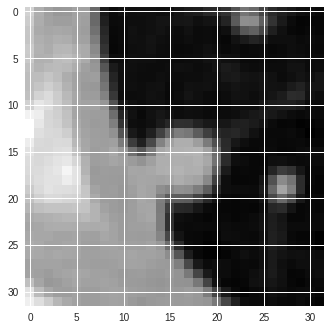

FN: -1


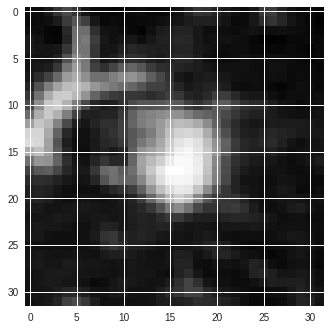

TP: 11.491765


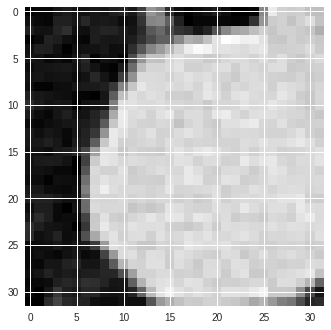

TP: 11.127279


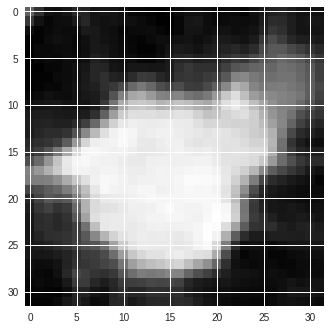

TP: 15.006502


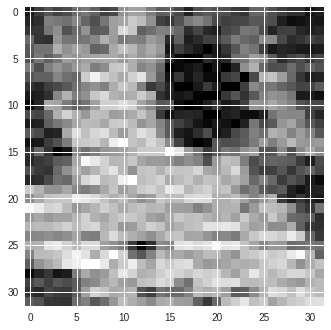

TP: 2.257453


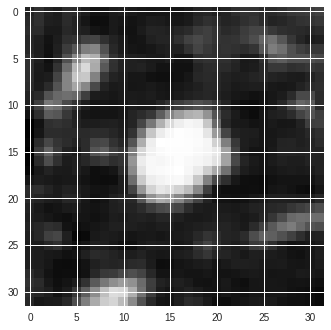

FN: -2


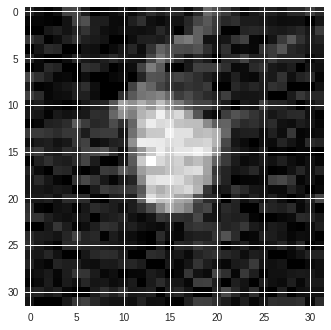

FN: -2


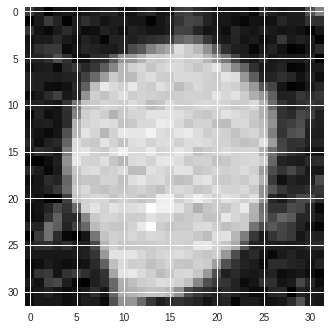

FN: 0


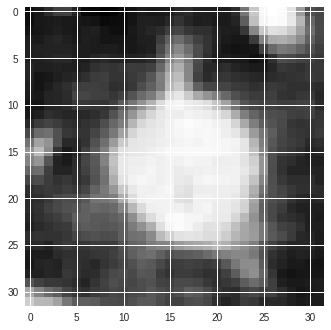

TP: 13.852741


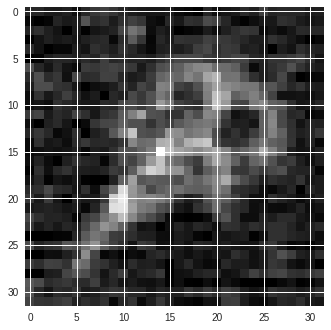

TP: 1.472293


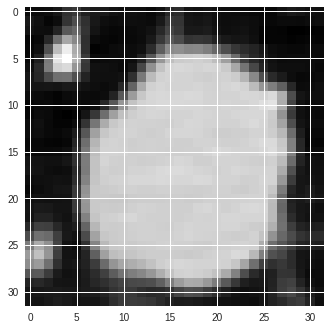

FN: -7


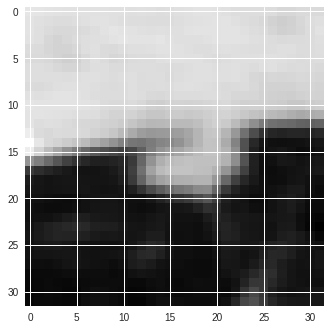

FN: -2


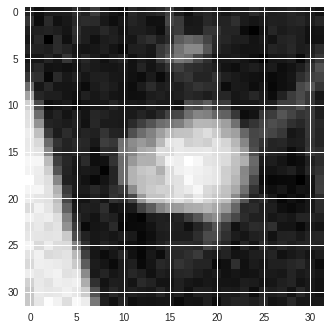

FN: -3


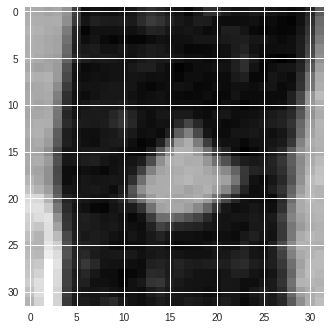

TP: 8.616030


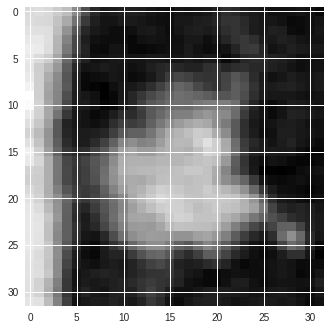

FN: -7


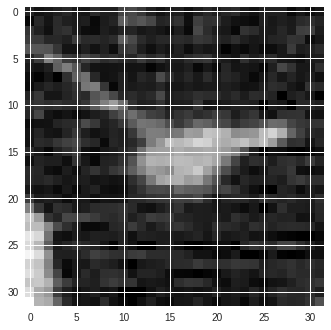

TP: 3.386060


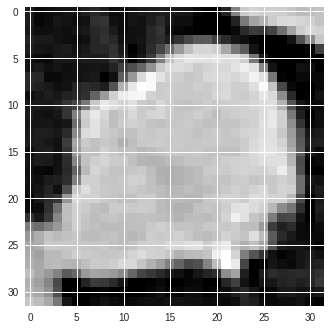

FN: -3


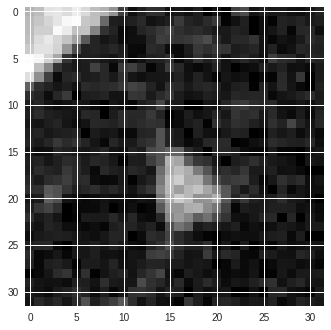

TP: 16.859248


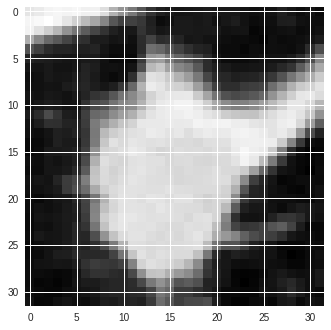

TP: 19.909295


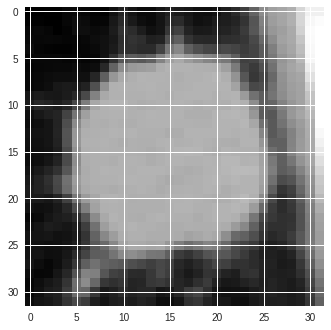

FN: -2


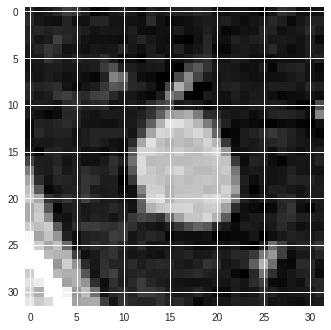

FN: -3


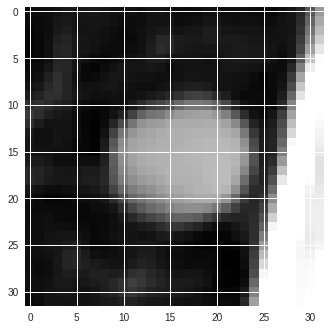

TP: 2.309351


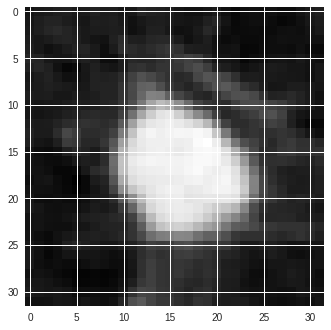

TP: 1.881139


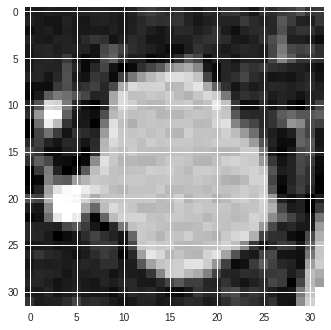

FN: -6


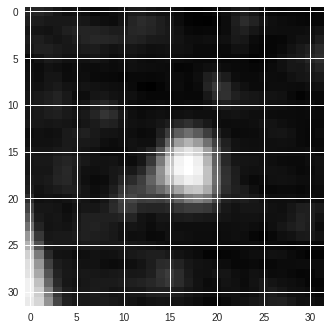

FN: -9


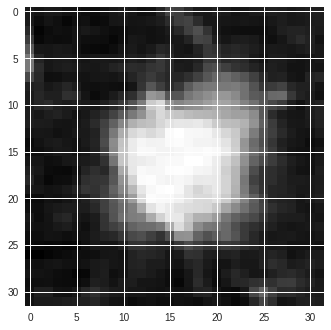

FN: -4


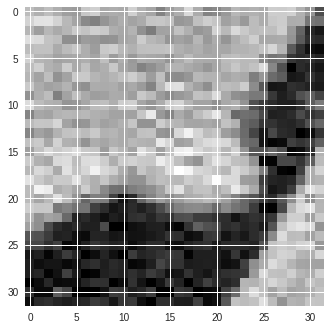

TP: 10.332971


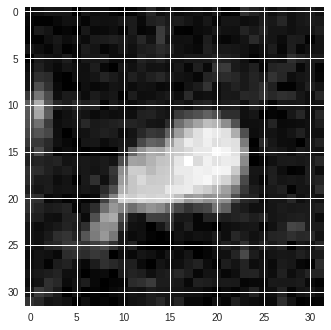

TP: 15.824959


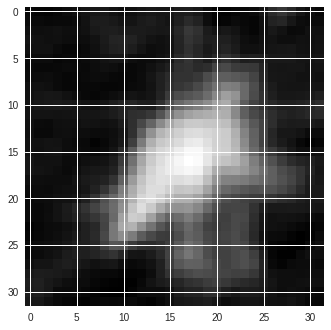

FN: -6


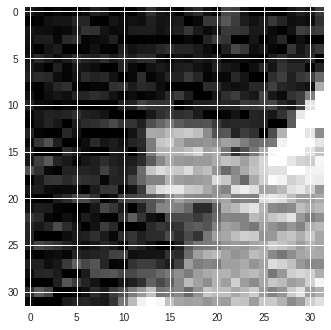

TP: 13.508609


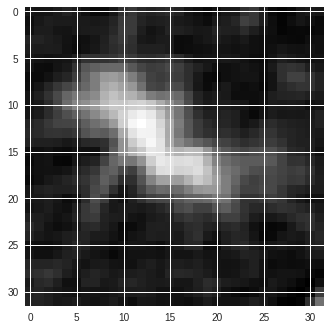

FN: -1


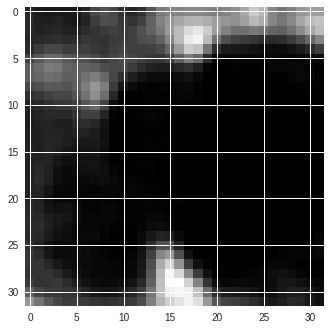

TP: 11.723524


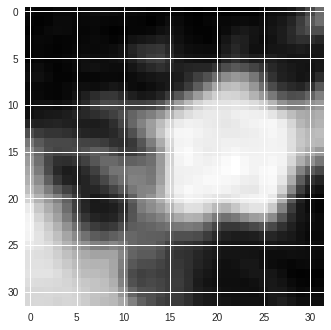

TP: 15.443406


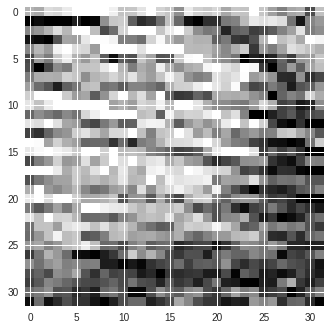

FN: -16


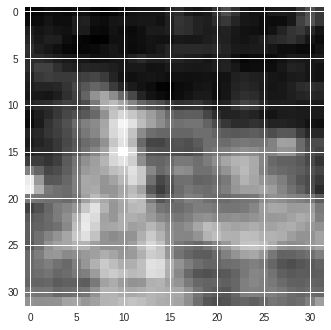

FN: -1


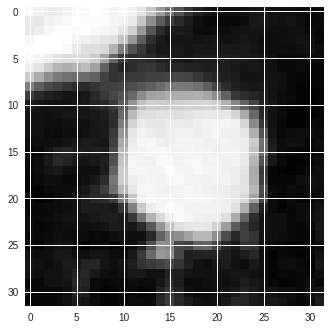

TP: 24.503765


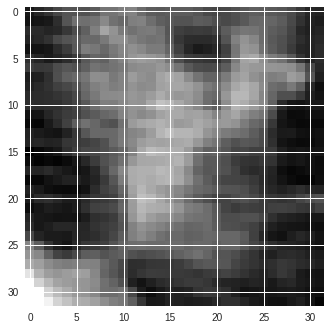

TP: 2.047699


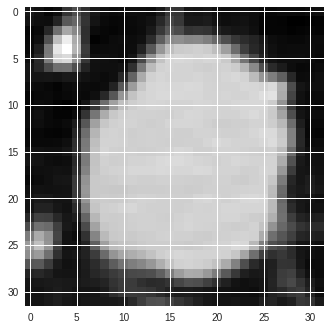

TP: 1.781788


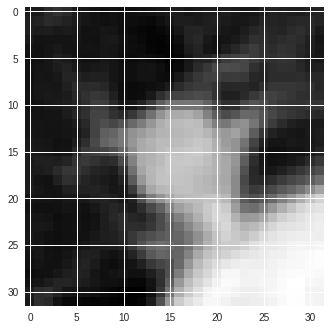

TP: 18.528975


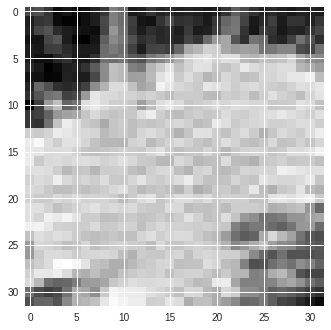

TP: 3.727848


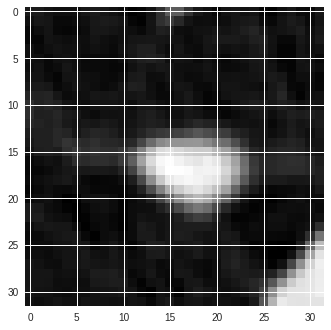

TP: 2.788339


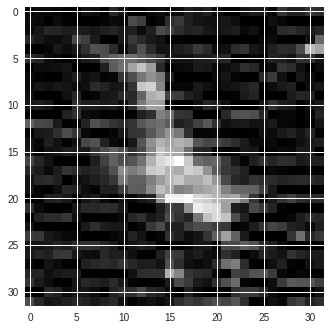

TP: 13.612759


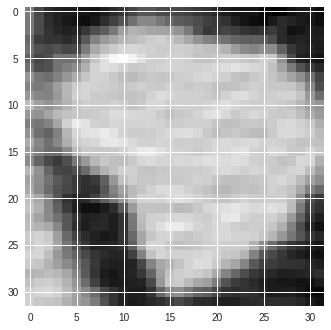

TP: 4.926113


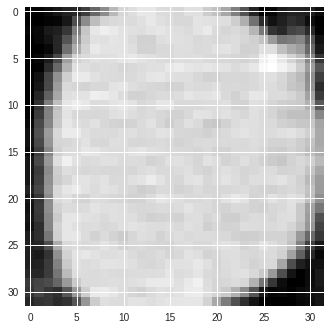

TP: 13.612838


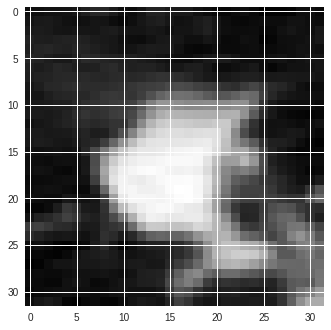

TP: 5.922352


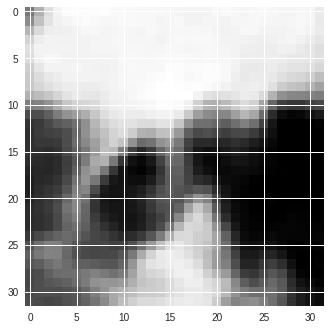

FN: -7


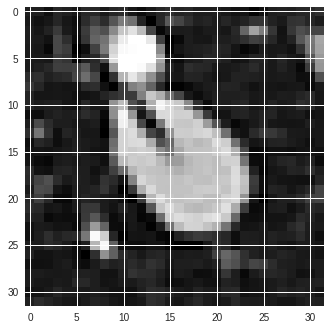

FN: -5


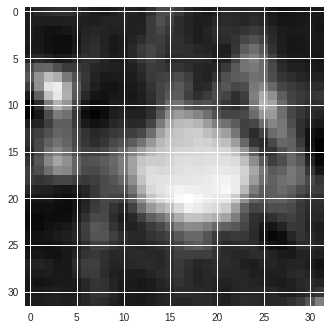

TP: 13.367322


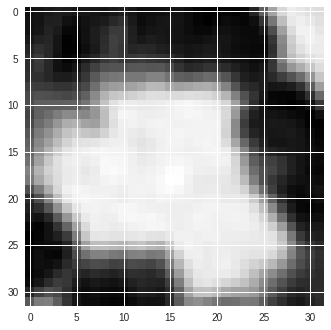

FN: -4


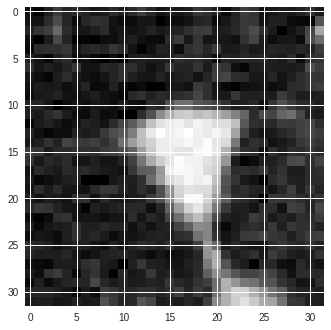

FN: -5


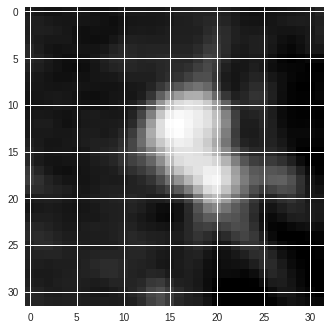

FN: -4


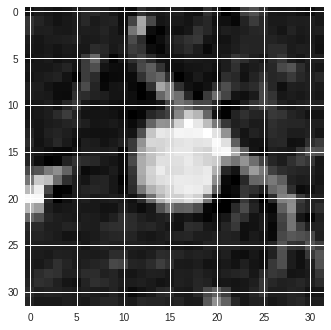

FN: -5


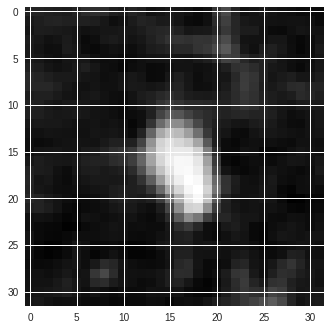

FN: -2


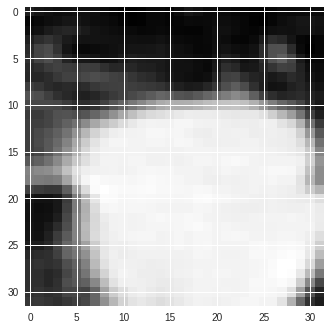

TP: 0.975398


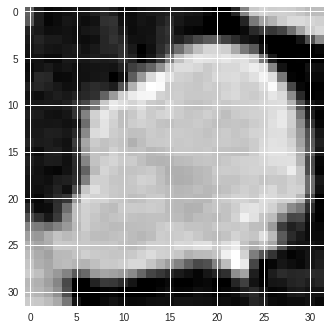

TP: 0.665903


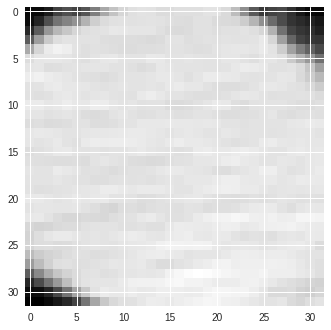

FN: -3


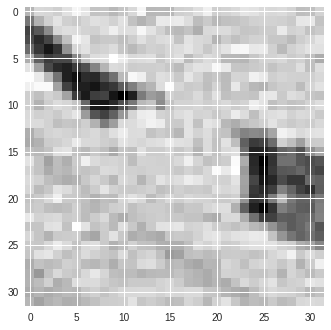

TP: 10.393776


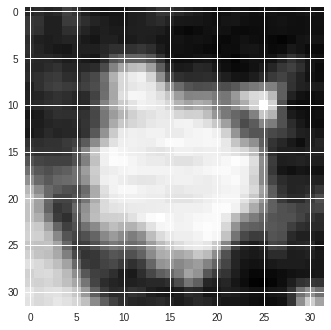

FN: 0


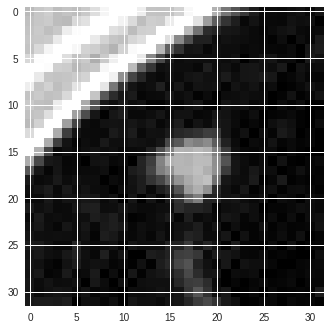

TP: 13.899293


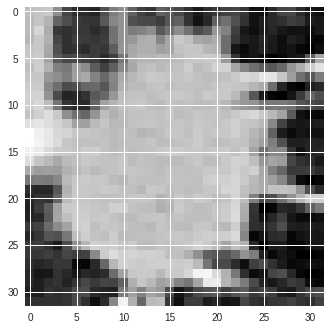

TP: 12.559138


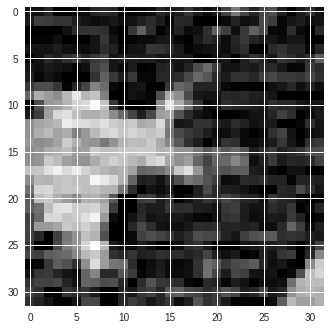

TP: 12.772991


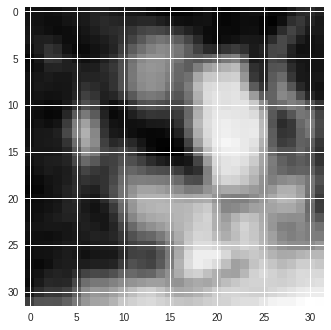

TP: 18.370718


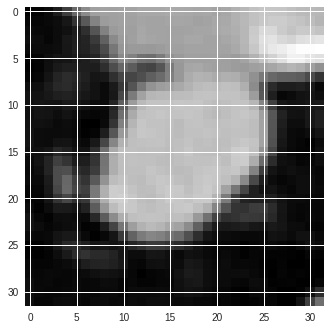

FN: -4


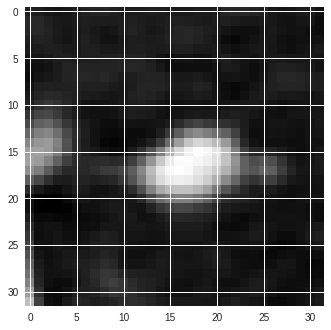

FN: -3


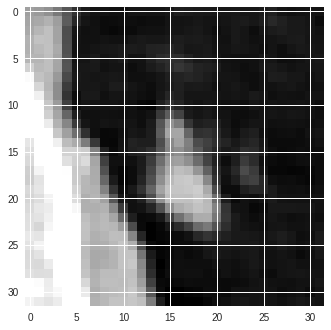

FN: -1


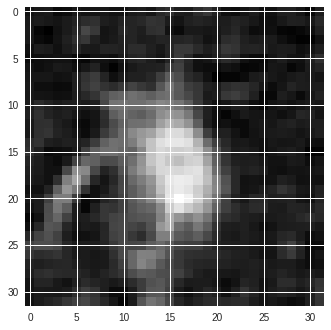

TP: 11.766440


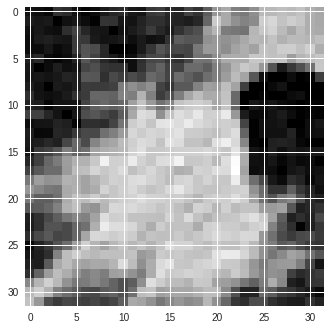

FN: -10


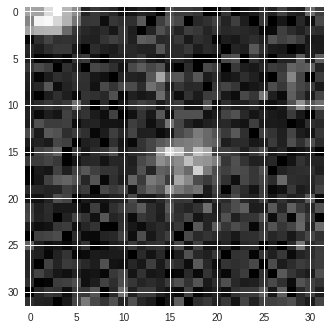

TP: 8.176543


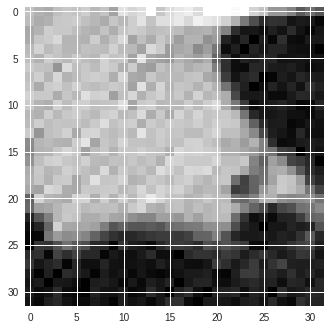

TP: 5.598181


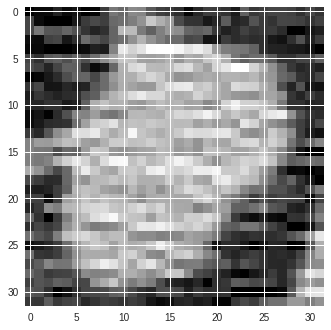

FN: -1


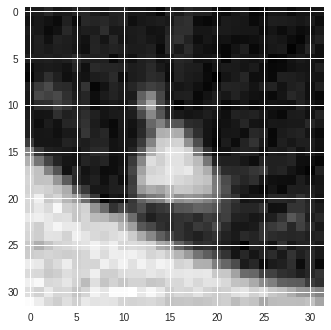

FN: 0


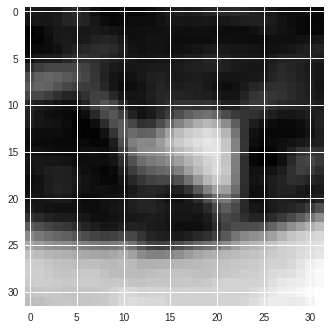

TP: 24.602342


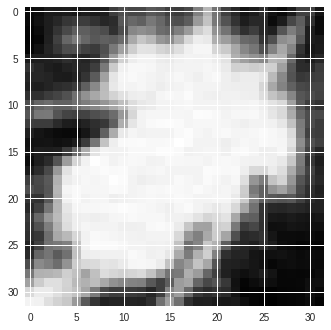

FN: -5


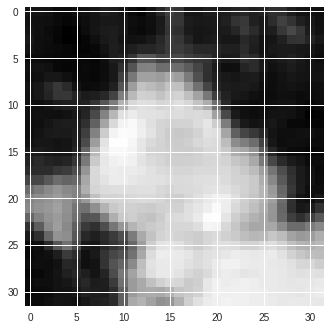

FN: -5


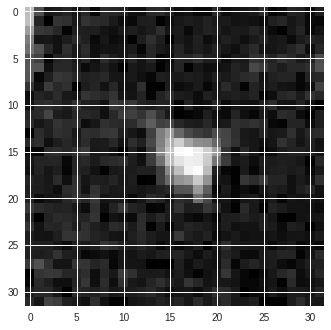

FN: 0


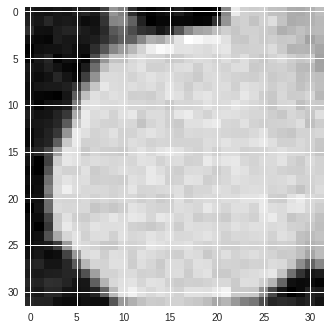

FN: -1


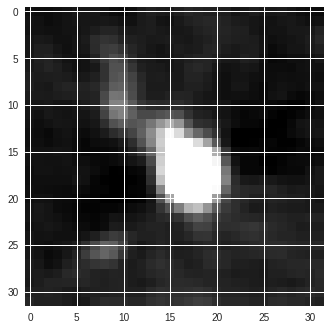

TP: 7.739073


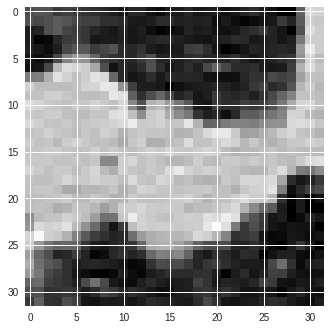

TP: 4.261574


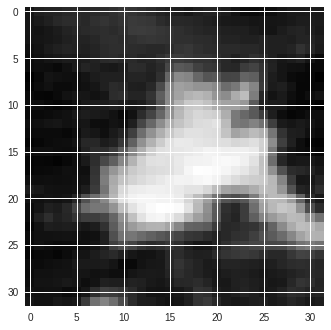

FN: 0


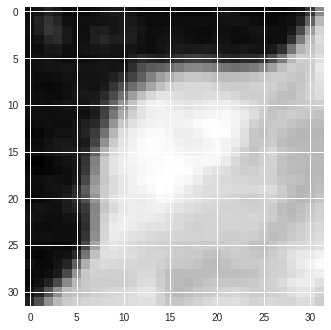

FN: -3


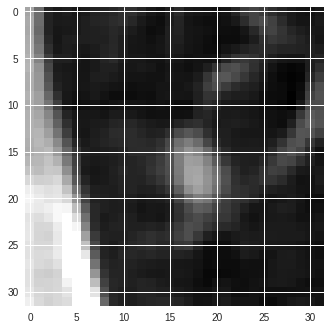

FN: -1


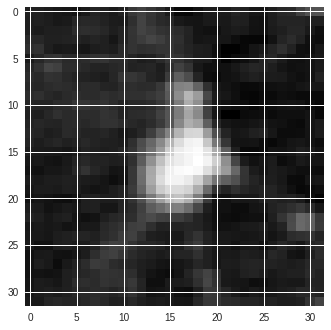

TP: 15.684607


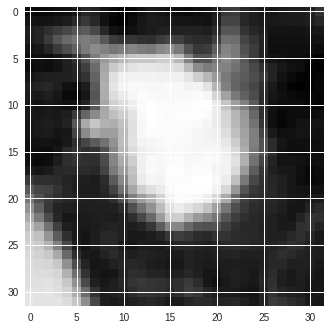

TP: 3.761840


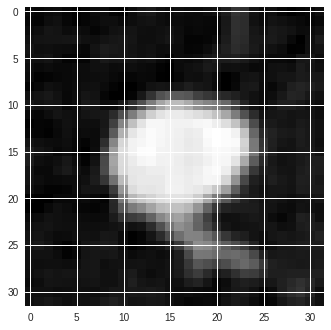

TP: 3.220586


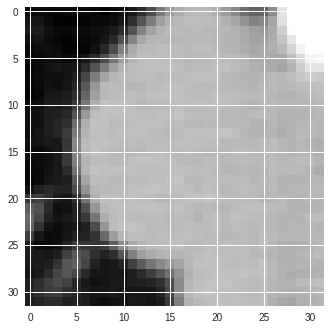

TP: 17.730942


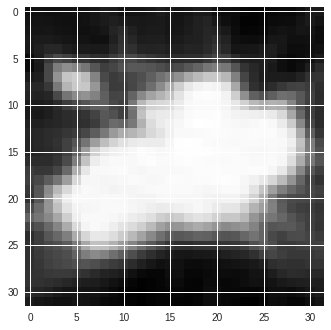

TP: 4.330698


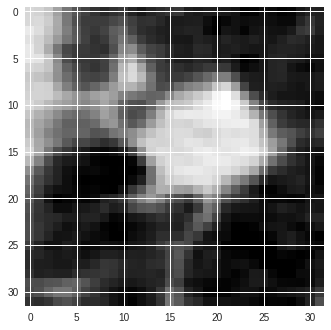

FN: -4


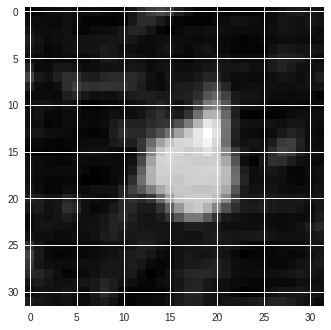

TP: 7.983114


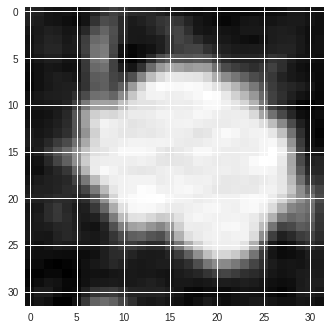

TP: 1.663617


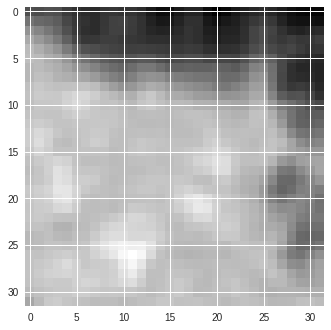

FN: -6


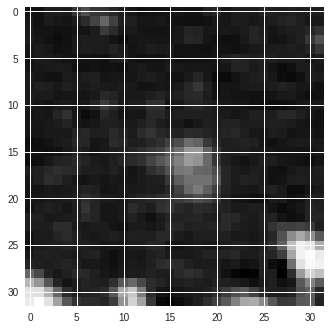

FN: -2


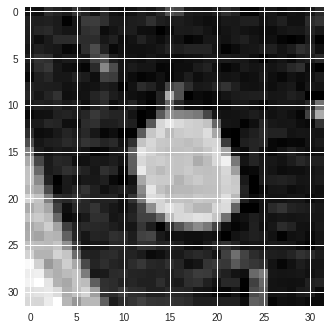

TP: 17.928654


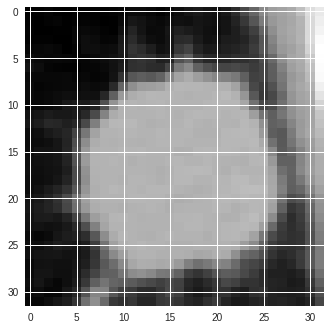

FN: -7


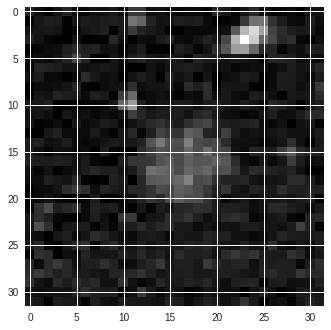

FN: -1


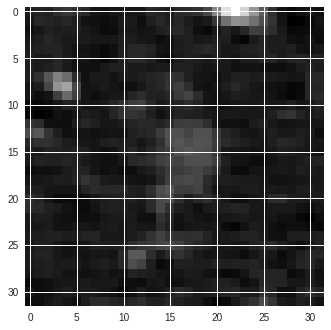

TP: 4.660977


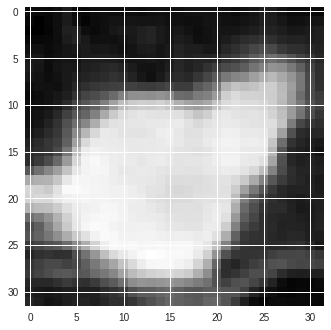

TP: 6.810828


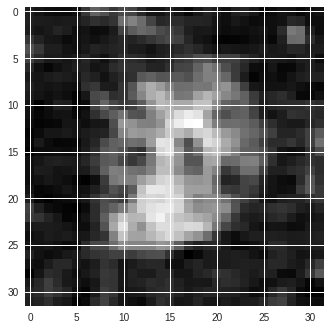

TP: 12.363610


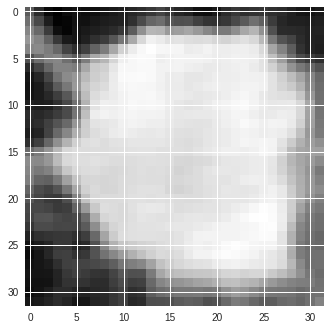

TP: 13.238813


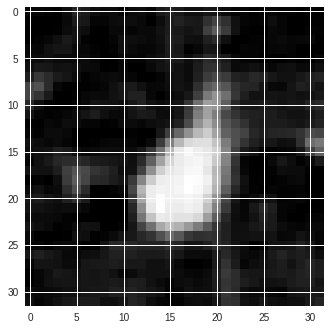

TP: 5.634756


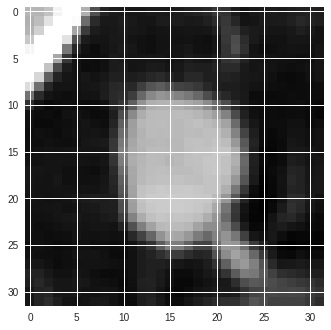

TP: 8.146834


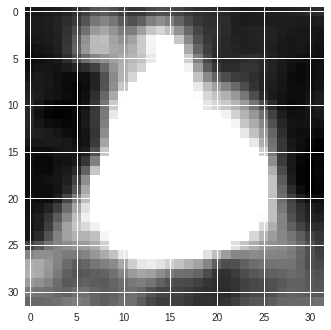

TP: 5.534737


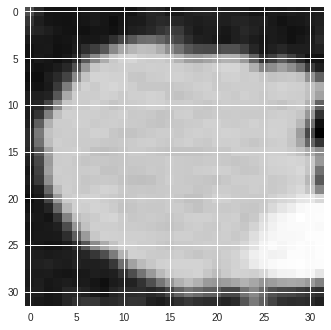

TP: 0.670696


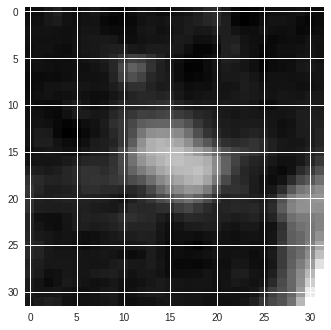

TP: 0.741414


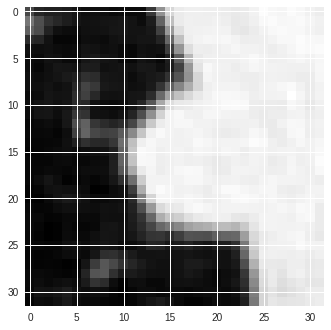

TP: 3.996438


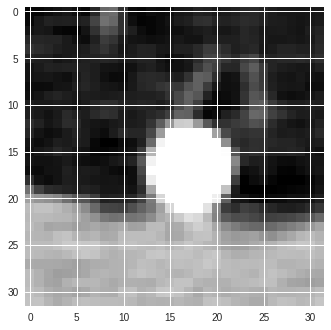

TP: 5.087489


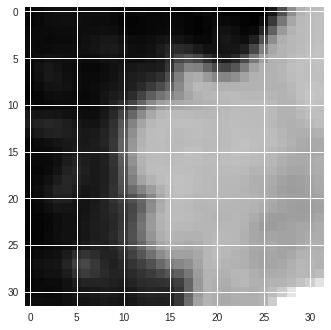

TP: 11.127279


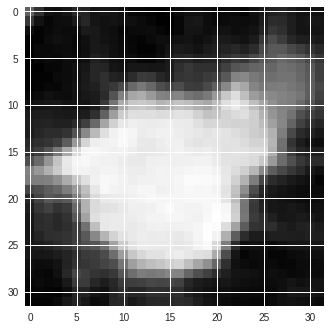

FN: -9


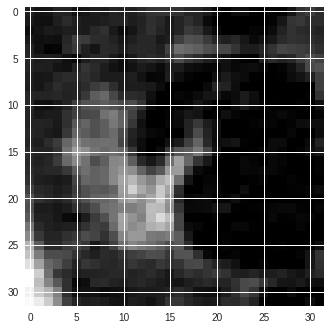

TP: 15.519132


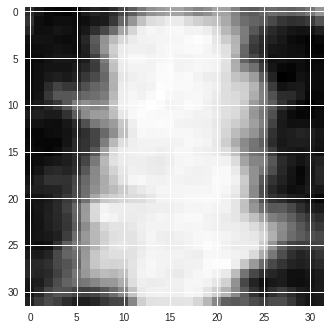

FN: -2


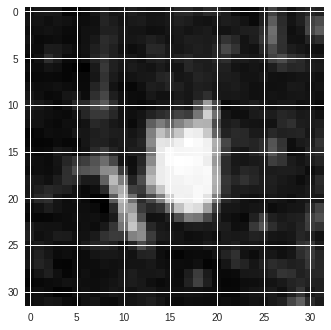

TP: 0.477953


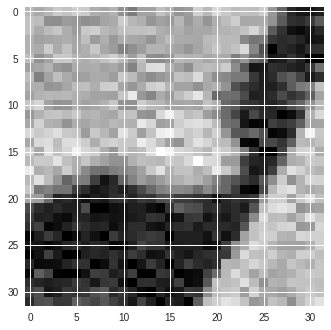

FN: -7


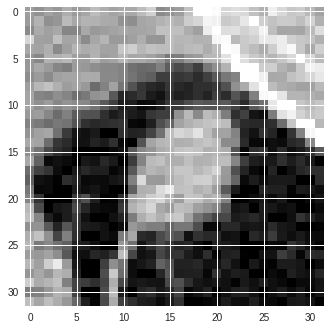

FN: -4


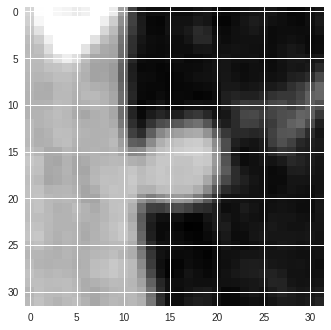

TP: 5.863390


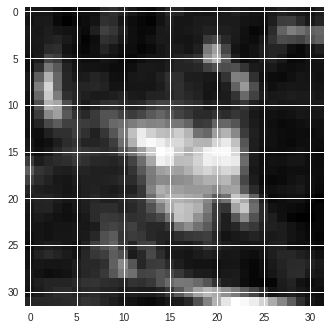

TP: 12.864839


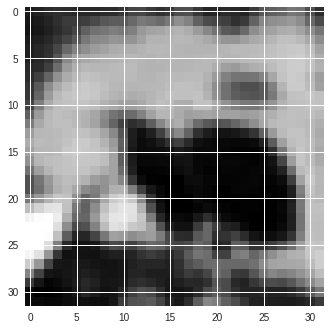

TP: 6.576164


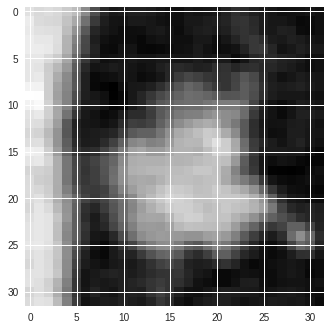

FN: -5


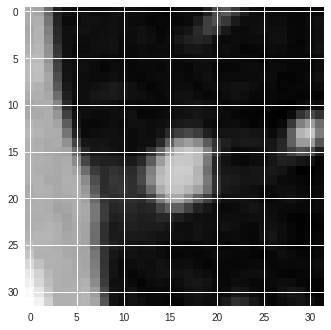

TP: 5.727559


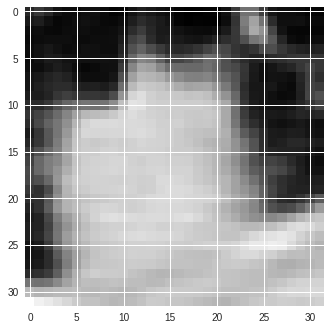

TP: 13.413372


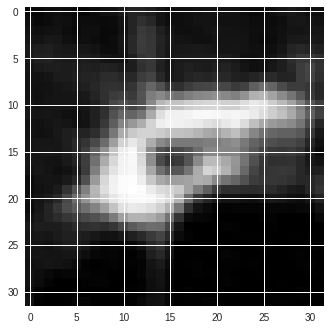

TP: 4.062722


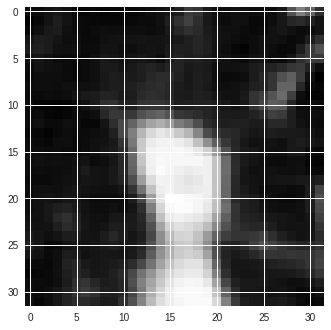

TP: 13.301038


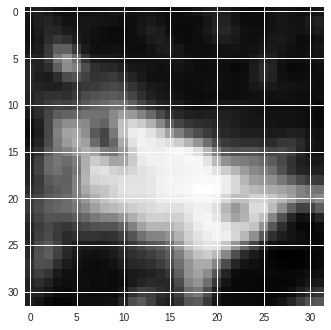

FN: 0


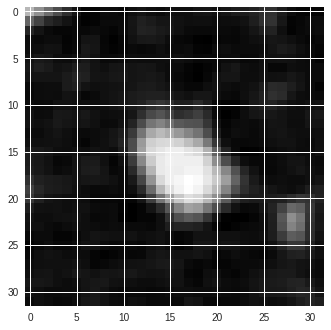

FN: -3


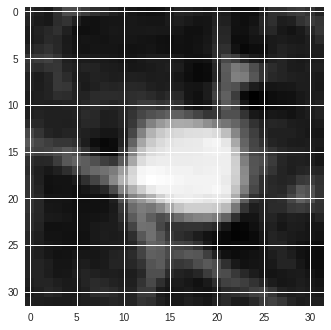

TP: 11.730383


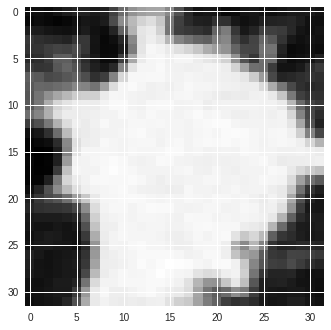

TP: 22.317724


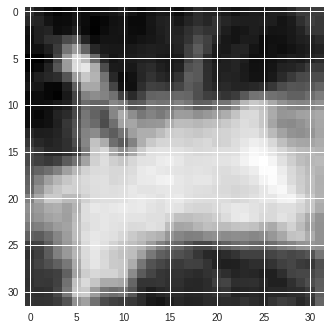

TP: 5.158957


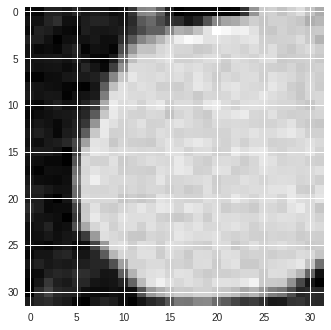

TP: 2.423478


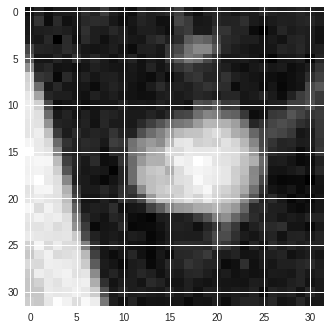

FN: 0


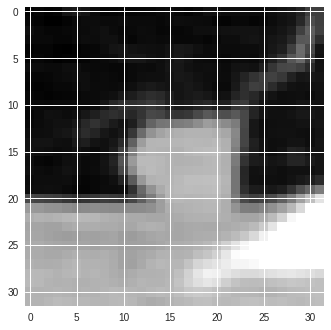

FN: -1


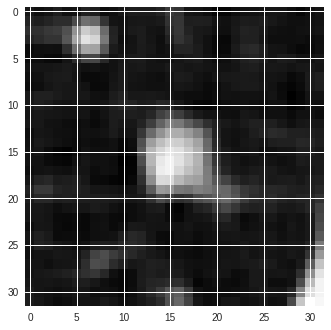

FN: -1


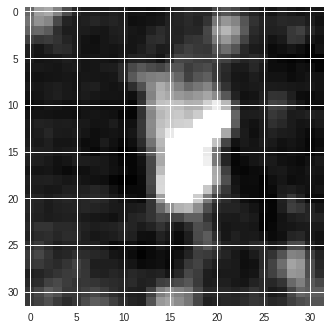

TP: 19.477910


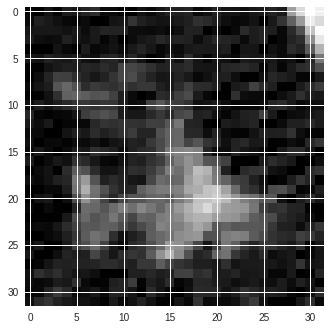

TP: 9.119036


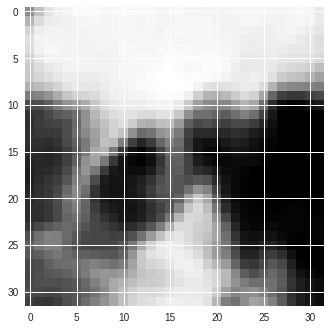

TP: 21.416521


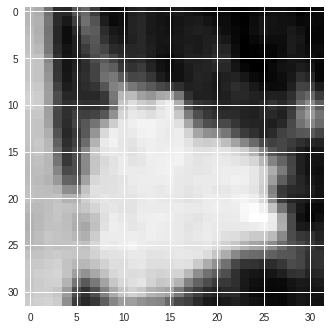

TP: 0.735960


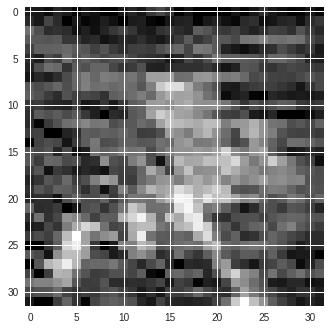

TP: 5.566718


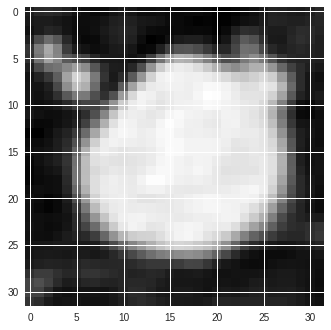

FN: -4


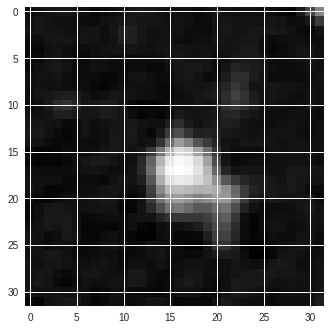

FN: -1


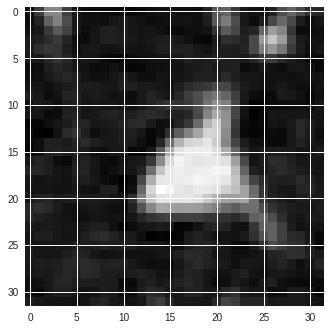

In [27]:
for i,pred in enumerate(y_pred):
    if pred == 1 and y_test[i] == 1:
        print("TP: %f" % y_score[i])
        img = X_test[i][9:].reshape((32,32))
        plt.imshow(img, cmap='gray')
        plt.show()
    if pred == 0 and y_test[i] == 1:
        print("FN: %d" % y_score[i])
        img = X_test[i][9:].reshape((32,32))
        plt.imshow(img, cmap='gray')
        plt.show()

